In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 465 kB 48.5 MB/s 


In [3]:
import pickle
from google.colab import drive

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

from tqdm.notebook import tqdm
from collections import Counter
import statistics as stats
import re

from konlpy.tag import Okt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [4]:
songs = pd.read_excel('/content/song_lyrics_labeled (1).xlsx')
songs.dropna(inplace=True)
songs

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,year,singer,names,categories,lyrics,hope,money,...,friend,equal,swear,nature,regret,memory,sf,food,confi,enjoy
0,0,0,0,1964,금호동,내일또만납시다,희망,하루의 일을 끝내고 돌아가는거리엔 사람의 물결하늘엔 별이 하나 둘 반짝이면가로등 하...,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1964,최숙자,눈물의연평도,"후회, 자연",조기를 담뿍잡아기폭을 올리고온다던 그배는어이하여 아니오나수평선 바라보며그이름 부르면...,0,0,...,0,0,0,1,1,0,0,0,0,0
2,2,2,2,1964,이미자,님이라부르리까,사랑,<1절 임이라 부르리까 당신이라고 부르리까 사랑을 하면서도 사랑을 참고사는 마음으로...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,1964,이미자,동백아가씨,"사랑, 후회",헤일 수 없이 수많은 밤을내 가슴 도려내는 아픔에 겨워얼마나 울었던가 동백아가씨그리...,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,4,4,1964,현미,떠날때는말없이,"사랑, 후회",그 날 밤 그 자리에둘이서 만났을 때똑같은 그 순간에똑같은 마음이달빛에 젖은 채밤새...,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,6195,6195,7432,2021,IVE(아이브),ELEVEN,사랑,따분한 나의 눈빛이 무표정했던 얼굴이 널 보며 빛나고 있어 널 담은 눈동자는 내 ...,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,6196,6196,7433,2021,다비치,매일크리스마스(EverydayChristmas),사랑,모두가 기다려온 이 겨울 두 손엔 가득 선물을 행복한 사람들 빛...,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,6197,6197,7434,2021,아이유(IU),겨울잠,희망,때 이른 봄 몇 송이 꺾어다 너의 방 문 앞에 두었어 긴 잠 실컷 자고 나오면 그때...,1,0,...,0,0,0,0,0,0,0,0,0,0
6198,6198,6198,7435,2021,폴킴(PaulKim),찬란한계절,사랑,비가 내리는 반대편으로 여름을 향해 달리네 내게로 내미는 어떤 것도 끝내 붙잡지 못...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def combine_df(df):
  full = []
  for i in tqdm(range(df.shape[0])):
    sem = []
    for j in range(8,22):
      sem.append(songs.iloc[i][j])
    full.append(sem)
  return full

In [6]:
full = combine_df(songs)
songs['full'] = full

  0%|          | 0/6200 [00:00<?, ?it/s]

In [7]:
def get_number(df):
  sum = 0
  for i in range(df.shape[0]):
    sum += df.iloc[i]
  return sum

In [ ]:
# print(get_number(songs.hope))
# print(get_number(songs.money))
# print(get_number(songs.love))
# print(get_number(songs.filial))
# print(get_number(songs.friend))
# print(get_number(songs.equal))
# print(get_number(songs.swear))
# print(get_number(songs.nature))
# print(get_number(songs.regret))
# print(get_number(songs.memory))
# print(get_number(songs.sf))
# print(get_number(songs.food))
# print(get_number(songs.confi))
# print(get_number(songs.enjoy))

In [8]:
X = songs.lyrics
y = songs.memory

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8, stratify=y
)

In [10]:
okt = Okt()

In [11]:
def clean_lyrics(df):

  lst = ['Noun', 'Adjective', 'Adverb', 'Verb']
  final = []
  
  for i in tqdm(range(df.shape[0])):
    result = []
    test_txt = re.sub("[^가-힣\\s]", "", df['lyrics'].iloc[i])
    test_review = okt.pos(test_txt, stem=True)
    for j in range(len(test_review)):
      if test_review[j][1] in lst:
        result.append(test_review[j][0])
    final.append(result)
  
  return final

In [12]:
def stopword_list(df):

  lst = ['Noun', 'Adjective', 'Adverb', 'Verb']
  final = []
  
  for i in tqdm(range(df.shape[0])):
    test_txt = re.sub("[^가-힣\\s]", "", df['lyrics'].iloc[i])
    test_review = okt.pos(test_txt, stem=True)
    for j in range(len(test_review)):
      if test_review[j][1] in lst:
        final.append(test_review[j][0])

  num_counts = Counter(final)
  sorted_counts = sorted(num_counts.items(), key=lambda x:x[1])

  return sorted_counts

In [13]:
def find_stopwords(lst):
  # p1 < p2
  p1=0.8
  p2=0.9
  idx1 = int(p1*len(lst))
  idx2 = int(p2*len(lst))
  return lst[idx1:idx2]

In [14]:
# count는 각 단어별로 개수
count = stopword_list(songs)

  0%|          | 0/6200 [00:00<?, ?it/s]

In [15]:
stop_list = ['잠', '바', '워', '몸', '진짜', '언젠가', '죽다', '힘', '뭐라다', '절대', '그저', '애', '하얗다', '돌다', '누가', '크다', '늘', '다시다', '뜨겁다', '아침', '가지', '숨', '상처', '뛰다', '순', '듣다', '머리', '단지', '이상', '꼭', '어리다', '기다', '따르다', '채', '향', '떨어지다', '듯', '예', '뜨다', '아직도', '갖다', '전', '나오다']
stop_list2 = ['받다', '때문', '지다', '서다', '이름', '많이', '수가', '조금', '아래', '두', '좀', '의', '무엇', '한번']
stop_list3 = ['줄', '처럼', '누구', '뿐', '만들다', '게', '순간', '어디', '미치다', '다른', '길', '뭐', '음', '안녕', '저', '건', '하루', '그래서', '여기', '이렇다', '손', '그렇게','우', '자다', '많다', '노래', '뒤', '응', '곳', '말다', '거', '정말', '대다', '이다', '웃다', '못', '하늘', '에스', '어떻다', '없이', '해주다', '곁', '나다', '티', '모든', '이렇게', '들다']
stop_list4 = ['하다', '있다', '없다', '말', '되다', '그렇다', '생각', '걸', '그', '것', '오', '이', '다', '속','해',
 '돼다', '알', '젠', '나르다', '주다', '아기', '중', '사람', '오다','가다','않다']

In [16]:
def stopit(stop):
  for i in range(len(stop)):
    if type(stop[i]) != str:
      print('err')

In [17]:
stopit(stop_list4)

In [18]:
stop_list.extend(stop_list2)
stop_list.extend(stop_list3)
stop_list.extend(stop_list4)

In [19]:
dic_list = []
# 노래 가사에 나온 단어들을 정리한 리스트를 만들어주자
for i in range(len(count)):
  dic_list.append(count[i][0])

# dic_list

In [20]:
# 각 단어를 key 로 설정하고 value 는 모두 0으로 지정해주자
dictionary = dict.fromkeys(dic_list, 0)

# dictionary

In [21]:
lyrics_list = clean_lyrics(songs)

  0%|          | 0/6200 [00:00<?, ?it/s]

In [22]:
def doc_frequency(lyrics):

  for lyric in tqdm(lyrics):
    num_count = Counter(lyric)
    for word in dic_list:
      if num_count[word] > 0:
        dictionary[word] += 1

In [23]:
doc_frequency(lyrics_list)

  0%|          | 0/6200 [00:00<?, ?it/s]

In [ ]:
# val = list(dictionary.values())
# val[-4650]

In [ ]:
# def find_frequency():
  

In [ ]:
# a = find_stopwords(count)

In [ ]:
# df = pd.DataFrame(a)
# csv = df.to_csv('stopwords.csv', index = False)
# pd.read_csv('stopwords.csv')

In [24]:
def preprocessing(review): 
    okt = Okt()
    
    f = open('stop_list.txt')
    stop_words = f.read().split()
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    review_text = re.sub("[^가-힣\\s]", "", review)
    
    # 2. okt 객체를 활용해서 형태소 토큰화 + 품사 태깅
    word_review = okt.pos(review_text, stem=True)
    
    # 노이즈 & 불용어 제거
    word_review = [(token, pos) for token, pos in word_review if not token in stop_list]
    
    # 명사, 동사, 형용사 추출
    word_review = [token for token, pos in word_review if pos in ['Noun', 'Verb', 'Adjective', 'Adverb']]

    return word_review

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

bow = CountVectorizer(tokenizer=preprocessing, min_df=5, max_df=0.5) 

X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [28]:
tfidf = TfidfVectorizer(tokenizer=preprocessing, max_features=3000, min_df=5, max_df=0.5) 

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 모델링

### 4-1. 모델 생성

In [29]:
# dt = DecisionTreeClassifier(random_state=2)
# dt.fit(X, y)

In [30]:
# 분류모델을 담을 리스트 생성 
classifiers = []

# random_state 설정
random_state = 2

# 데이터프레임 생성을 위하여 알고리즘 제목 저장
clf_names = ['Decision Tree','Random Forest', 'AdaBoost', 'Extra Trees', 'Gradient Boost',
             'MLP', 'KNN', 'Support Vector', 'Logistic Regression', 'Linear Discrimination']

# 트리 기반 알고리즘
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

# 그 외 선형, 신경망 등의 알고리즘
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [32]:
# 레이블인코딩된 데이터로 교차검증을 수행하여 리스트에 저장

kfold = StratifiedKFold(n_splits=3)

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_tfidf, y = y_train,
                                      scoring = "accuracy", cv = kfold, n_jobs=4))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 545, in fit
    X, y, ensure_min_samples=2, estimator=self, dtype=[np.float64, np.float32]
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File 

In [33]:
# 교차검증 점수 리스트 출력
cv_results

[array([0.90870617, 0.92256503, 0.91893527]),
 array([0.94437727, 0.94676346, 0.9491833 ]),
 array([0.9280532 , 0.93466425, 0.93889897]),
 array([0.94316808, 0.9461585 , 0.9491833 ]),
 array([0.93954051, 0.94494858, 0.94373866]),
 array([0.93833132, 0.94010889, 0.93708409]),
 array([0.9407497 , 0.93829401, 0.94131881]),
 array([0.94437727, 0.94373866, 0.94373866]),
 array([0.94256348, 0.9431337 , 0.94252874]),
 array([nan, nan, nan])]

In [34]:
# 모델들의 교차검증 점수의 평균과 표준편차를 계산하여 리스트에 저장
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [35]:
# 데이터프레임으로 변환
results_le = pd.DataFrame(cv_results, index=clf_names)
results_le

,0,1,2
Decision Tree,0.908706,0.922565,0.918935
Random Forest,0.944377,0.946763,0.949183
AdaBoost,0.928053,0.934664,0.938899
Extra Trees,0.943168,0.946158,0.949183
Gradient Boost,0.939541,0.944949,0.943739
MLP,0.938331,0.940109,0.937084
KNN,0.940750,0.938294,0.941319
Support Vector,0.944377,0.943739,0.943739
Logistic Regression,0.942563,0.943134,0.942529
Linear Discrimination,NaN,NaN,NaN


In [36]:
# 모델별 교차검증 점수 평균, 표준편차를 새로운 칼럼으로 추가
results_le['mean'] = cv_means
results_le['std'] = cv_std

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


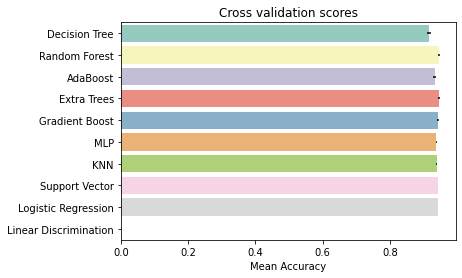

In [37]:
#  모델별 교자검증 점수 평균 시각화
g = sns.barplot("mean",results_le.index ,data = results_le, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [38]:
# 행/열 전환
results_le.T

,Decision Tree,Random Forest,AdaBoost,Extra Trees,Gradient Boost,MLP,KNN,Support Vector,Logistic Regression,Linear Discrimination
0,0.908706,0.944377,0.928053,0.943168,0.939541,0.938331,0.940750,0.944377,0.942563,NaN
1,0.922565,0.946763,0.934664,0.946158,0.944949,0.940109,0.938294,0.943739,0.943134,NaN
2,0.918935,0.949183,0.938899,0.949183,0.943739,0.937084,0.941319,0.943739,0.942529,NaN
mean,0.916735,0.946775,0.933872,0.946170,0.942743,0.938508,0.940121,0.943952,0.942742,NaN
std,0.005868,0.001962,0.004463,0.002456,0.002317,0.001241,0.001312,0.000301,0.000277,NaN


In [39]:
# def find_outliers(df):
#   for i in range(0,9):
#     for j in range(0,10):
#       if df.iloc[i][j] > df.iloc[i]['mean'] + 2*df.iloc[i]['std'] or df.iloc[i][j] < df.iloc[i]['mean'] - 2*df.iloc[i]['std']:
#         print(i,j)



In [40]:
# find_outliers(results_le)

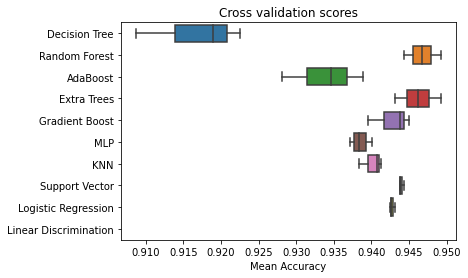

In [41]:
# 모델별 교차검증 점수 시각화
results1 = results_le.drop(['mean', 'std'], axis=1)
g = sns.boxplot(data=results1.T, orient='h')
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

### 4-2. 하이퍼 파라미터 튜닝


### Random Forest

In [42]:
# Random Forest 객체 생성
RFC = RandomForestClassifier(random_state=7)


# param_grid 설정
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Grid Search 객체 생성
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsRFC.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [43]:
# 최적의 파라미터 조합 출력
RFC_best = gsRFC.best_estimator_
RFC_params = gsRFC.best_params_
print(RFC_best)
print(RFC_params)

# 최고 점수(accuracy) 출력
print(gsRFC.best_score_)


RandomForestClassifier(bootstrap=False, min_samples_split=3, n_estimators=300,
                       random_state=7)
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
0.9445572192583782


### KNN (K-Nearest Neighbors)

In [44]:
# KNN 객체 생성
KNN = KNeighborsClassifier()

# param_grid 설정
knn_param_grid = {"n_neighbors" : [1, 2, 3, 4, 5], 
                  "algorithm": ['auto'],
                  "weights" : ['uniform', 'distance'],
                  "leaf_size" : [1, 2, 3, 4, 5, 10]}

# Grid Search 객체 생성
gsKNN = GridSearchCV(KNN, param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsKNN.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [1, 2, 3, 4, 5, 10],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [45]:
# 최적의 파라미터 조합 출력
KNN_best = gsKNN.best_estimator_
KNN_params = gsKNN.best_params_
print(KNN_best)
print(KNN_params)
# 최고 점수(accuracy) 출력
print(gsKNN.best_score_)


KNeighborsClassifier(leaf_size=1, weights='distance')
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}
0.9439522585808221


### AdaBoost

In [46]:
# AdaBoost 객체 생성
ADA = AdaBoostClassifier(random_state=7)

# param_grid 설정
ada_param_grid = {"n_estimators" :[1,20,30],
                  "algorithm" : ["SAMME","SAMME.R"],                  
              "learning_rate":  [0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

# Grid Search 객체 생성
gsADA = GridSearchCV(ADA, param_grid = ada_param_grid, cv=kfold, scoring="accuracy", verbose = 1)

# Grid Search 실행
gsADA.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=7),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 1.5],
                         'n_estimators': [1, 20, 30]},
             scoring='accuracy', verbose=1)

In [47]:
# 최적의 파라미터 조합 출력
ADA_best = gsADA.best_estimator_
ADA_params = gsADA.best_params_
print(ADA_best)
print(ADA_params)

# 최고 점수(accuracy) 출력
print(gsADA.best_score_)


AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, n_estimators=1,
                   random_state=7)
{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 1}
0.9427419714695571


### Gradient Boost

In [48]:
# Gradient boost 객체 생성
GBC = GradientBoostingClassifier(random_state=7)

# param_grid 설정
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              }
# Grid Search 객체 생성
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsGBC.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(random_state=7), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance'], 'max_depth': [4, 8],
                         'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [49]:
# 최적의 파라미터 조합 출력
GBC_best = gsGBC.best_estimator_
GBC_params = gsGBC.best_params_
print(GBC_best)
print(GBC_params)

# 최고 점수(accuracy) 출력
print(gsGBC.best_score_)


GradientBoostingClassifier(learning_rate=0.05, max_depth=8,
                           min_samples_leaf=100, n_estimators=200,
                           random_state=7)
{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 8, 'min_samples_leaf': 100, 'n_estimators': 200}
0.9435487076250161


### Extra Trees

In [50]:
#ExtraTrees 객체 생성
Ext = ExtraTreesClassifier(random_state=7)


# param_grid 설정
ex_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Grad Search 객체 생성
gsExt = GridSearchCV(Ext,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsExt.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(random_state=7), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [51]:
# 최적의 파라미터 조합 출력
Ext_best = gsExt.best_estimator_
Ext_params = gsExt.best_params_
print(Ext_best)
print(Ext_params)

# 최고 점수(accuracy) 출력
print(gsExt.best_score_)


ExtraTreesClassifier(min_samples_split=10, random_state=7)
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.94677467689711


### Decision Tree

In [52]:
# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=7, )

# param_grid 설정
dtc_param_grid = {"criterion" : ["gini", "entropy"],
              "min_samples_split" :   [2, 4, 6, 10],
              "min_samples_leaf" : [1,3, 5, 10]}

# Grad Search 객체 생성
gsDTC = GridSearchCV(DTC,param_grid = dtc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsDTC.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=7), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [2, 4, 6, 10]},
             scoring='accuracy', verbose=1)

In [53]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
DTC_params = gsDTC.best_params_
print(DTC_best)
print(DTC_params)

# 최고 점수(accuracy) 출력
print(gsDTC.best_score_)

DecisionTreeClassifier(min_samples_leaf=10, random_state=7)
{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2}
0.9397180215128017


### Support Vector

In [54]:
#Support Vector 객체 생성
SVM = SVC(random_state=7, probability=True)

# param_grid 설정
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

# Gradient boost 객체 생성
gsSVM = GridSearchCV(SVM,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsSVM.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(probability=True, random_state=7), n_jobs=4,
             param_grid={'C': [1, 10, 50, 100, 200, 300, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [55]:
# 최적의 파라미터 조합 출력
SVM_best = gsSVM.best_estimator_
SVM_params = gsSVM.best_params_
print(SVM_best)
print(SVM_params)

# 최고 점수(accuracy) 출력
print(gsSVM.best_score_)


SVC(C=10, gamma=0.1, probability=True, random_state=7)
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9463708821038684


### MLP(Multi-layer Perceptron)

In [56]:
# Linear Discrimination Analysis 객체 생성
MLP = MLPClassifier()

# param_grid 설정
mlp_param_grid = {'hidden_layer_sizes': [100, 150, 200, 250], 
                #   'activation': ['identity', 'logistic', 'tanh', 'relu'],
                #   'solver': ['lbfgs','sgd','adam'],
                  'alpha': [ 0.0001, 0.001, 0.01],
                #   'learning_rate': ['const  ant','invscaling','adaptive']
                }

# Gradient boost 객체 생성
gsMLP = GridSearchCV(MLP,param_grid = mlp_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsMLP.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=4,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [100, 150, 200, 250]},
             scoring='accuracy', verbose=1)

In [57]:
# 최적의 파라미터 조합 출력
MLP_best = gsMLP.best_estimator_
MLP_params = gsMLP.best_params_
print(MLP_best)
print(MLP_params)

# 최고 점수(accuracy) 출력
print(gsMLP.best_score_)


MLPClassifier(alpha=0.01, hidden_layer_sizes=200)
{'alpha': 0.01, 'hidden_layer_sizes': 200}
0.94112898683351


### Linear Discrimination Analysis

In [58]:
# Linear Discrimination Analysis 객체 생성
#LDA = LinearDiscriminantAnalysis()

# param_grid 설정
#lda_param_grid = {'solver': ['svd','lsqr','eigen'], 
#                  'n_components': [ 'False', 1, 3, 5],
#                  'tol': [1.0e-13, 1.0e-9, 1.0e-8, 1.0e-6, 1.0e-5]}

# Gradient boost 객체 생성
#gsLDA = GridSearchCV(LDA,param_grid = lda_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
#gsLDA.fit(X_train_tfidf,y_train)

In [59]:
# 최적의 파라미터 조합 출력
#LDA_best = gsLDA.best_estimator_
#LDA_params = gsLDA.best_params_
#print(LDA_best)
#print(LDA_params)

# 최고 점수(accuracy) 출력
#print(gsLDA.best_score_)


### Logistic Regression

In [60]:
# Logistic Regression 객체 생성
LGS = LogisticRegression(random_state=7)

# param_grid 설정
lgs_param_grid = {'penalty': ['l1','l2'], 
                  'C': np.logspace(0,4,10)}

# Gradient boost 객체 생성
gsLGS = GridSearchCV(LGS,param_grid = lgs_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

# Grid Search 실행
gsLGS.fit(X_train_tfidf,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=7), n_jobs=4,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [61]:
# 최적의 파라미터 조합 출력
LGS_best = gsLGS.best_estimator_
LGS_params = gsLGS.best_params_
print(LGS_best)
print(LGS_params)

# 최고 점수(accuracy) 출력
print(gsLGS.best_score_)


LogisticRegression(C=7.742636826811269, random_state=7)
{'C': 7.742636826811269, 'penalty': 'l2'}
0.9445563658273538


In [62]:
# # 모델 1 : Logistic Regression 모형
# from sklearn.linear_model import LogisticRegression

# log_clf = LogisticRegression()
# log_clf.fit(X_train_bow, y_train)
# print('Train set score: {:.3f}'.format(log_clf.score(X_train_bow, y_train)))
# print('Test set score: {:.3f}'.format(log_clf.score(X_test_bow, y_test)))

In [63]:
# # 모델 2 : 트리 앙상블 모형
# from sklearn.ensemble import RandomForestClassifier

# model_rf = RandomForestClassifier(n_estimators = 100, max_depth=30, random_state = 0)
# model_rf.fit(X_train_bow, y_train)
# print('Train set score: {:.3f}'.format(model_rf.score(X_train_bow, y_train)))
# print('Test set score: {:.3f}'.format(model_rf.score(X_test_bow, y_test)))

In [64]:
# # 모델 3 : Naive Bayes 분류모형
# from sklearn.naive_bayes import MultinomialNB

# NB_clf = MultinomialNB(alpha=0.1)
# NB_clf.fit(X_train_bow, y_train)
# print('Train set score: {:.3f}'.format(NB_clf.score(X_train_bow, y_train)))
# print('Test set score: {:.3f}'.format(NB_clf.score(X_test_bow, y_test)))

In [65]:
# 예시로 Random Forest classifier가 교차검증에서 가장 좋은 성능을 보였던 파라미터 조합으로 learning curve를 출력해보자.
lc = learning_curve(gsRFC.best_estimator_, X_train_tfidf, y_train, cv=3)
lc

(array([ 330, 1074, 1818, 2562, 3306]),
 array([[1.        , 1.        , 1.        ],
        [1.        , 0.9972067 , 0.9972067 ],
        [0.99944994, 0.99779978, 0.99779978],
        [0.99882904, 0.9980484 , 0.9980484 ],
        [0.99879008, 0.9984876 , 0.99637024]]),
 array([[0.94256348, 0.9431337 , 0.94434362],
        [0.94195889, 0.94434362, 0.94373866],
        [0.93954051, 0.94434362, 0.94555354],
        [0.94135429, 0.9431337 , 0.94494858],
        [0.9407497 , 0.94434362, 0.94857834]]))

In [66]:
# 첫 번째 행으로 learning curve를 생성하기 위해 사용된 학습 데이터 셋의 크기를 반환한다.
lc[0]

array([ 330, 1074, 1818, 2562, 3306])

In [67]:
# 두 번째 행으로 학습 데이터에 대한 점수를 반환한다.
lc[1]

array([[1.        , 1.        , 1.        ],
       [1.        , 0.9972067 , 0.9972067 ],
       [0.99944994, 0.99779978, 0.99779978],
       [0.99882904, 0.9980484 , 0.9980484 ],
       [0.99879008, 0.9984876 , 0.99637024]])

In [68]:
# 세 번째 행으로 검증 데이터에 대한 점수를 반환한다.
lc[2]

array([[0.94256348, 0.9431337 , 0.94434362],
       [0.94195889, 0.94434362, 0.94373866],
       [0.93954051, 0.94434362, 0.94555354],
       [0.94135429, 0.9431337 , 0.94494858],
       [0.9407497 , 0.94434362, 0.94857834]])

In [69]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    # 그래프 설정
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # 학습 데이터에 대한 점수의 평균
    train_scores_mean = np.mean(train_scores, axis=1)
    # 학습 데이터에 대한 점수의 표준편차
    train_scores_std = np.std(train_scores, axis=1)
    # 검증 데이터에 대한 점수의 평균
    test_scores_mean = np.mean(test_scores, axis=1)
    # 검증 데이터에 대한 점수의 표준편차
    test_scores_std = np.std(test_scores, axis=1)
    
    # 그래프에 눈금 표시
    plt.grid()

    # fill_between() = 그래프의 두 수평 방향의 곡선 사이를 색상으로 채워서 강조
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # 데이터를 연결하는 선을 plot
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    # 범례 표시
    plt.legend(loc="best")
    return plt

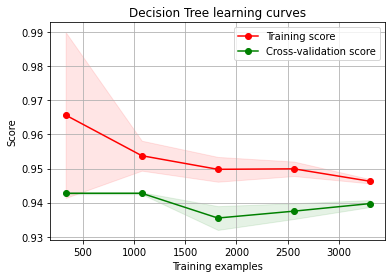

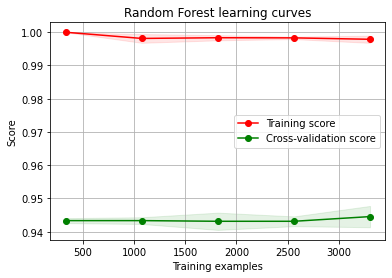

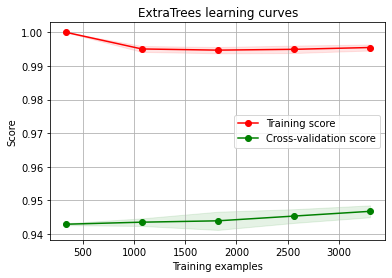

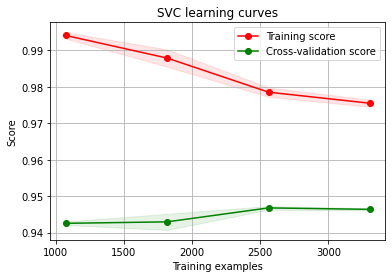

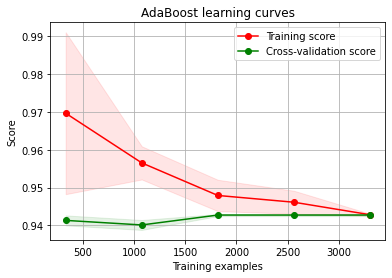

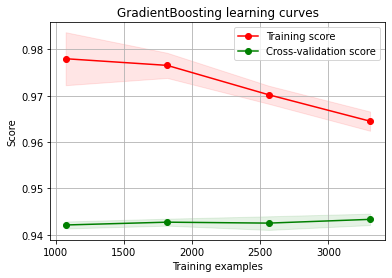

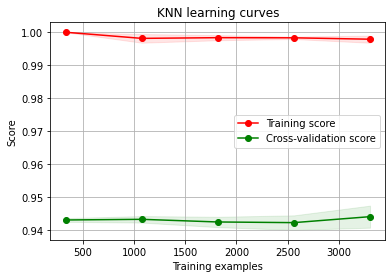

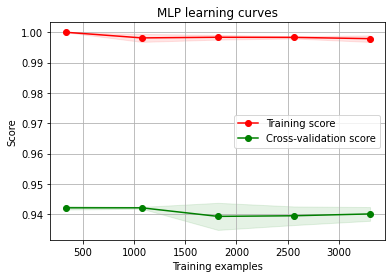

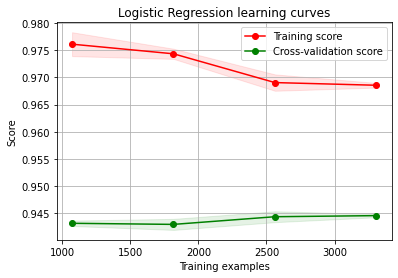

In [70]:
g = plot_learning_curve(DTC_best,"Decision Tree learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(RFC_best,"Random Forest learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(Ext_best,"ExtraTrees learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(SVM_best,"SVC learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(ADA_best,"AdaBoost learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(GBC_best,"GradientBoosting learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(KNN_best,"KNN learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(MLP_best,"MLP learning curves",X_train_tfidf,y_train,cv=kfold)
#g = plot_learning_curve(LDA_best,"Linear Discrimination Analysis learning curves",X_train_tfidf,y_train,cv=kfold)
g = plot_learning_curve(LGS_best,"Logistic Regression learning curves",X_train_tfidf,y_train,cv=kfold)

In [71]:
#튜닝한 파라미터로 하드보팅한 후 점수를 출력해보자.
grid_hard = VotingClassifier(estimators = [('Decision Tree', DTC_best), 
                                           ('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('SVC', SVM_best),
                                           ('AdaBoost', ADA_best),
                                           ('GradientBoosting', GBC_best),
                                           ('KNN', KNN_best),
                                           #('Linear Discrimination', LDA_best),
                                           ('MLP', MLP_best),
                                           ('Logistic Regression', LGS_best)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train_tfidf, y_train, cv=10)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 94.84


In [72]:
#튜닝한 파라미터로 소프트보팅한 후 점수를 출력해보자.
grid_soft = VotingClassifier(estimators = [('Decision Tree', DTC_best), 
                                           ('Random Forest', RFC_best),
                                           ('ExtraTrees', Ext_best),
                                           ('SVC', SVM_best),
                                           ('AdaBoost', ADA_best),
                                           ('GradientBoosting', GBC_best),
                                           ('KNN', KNN_best),
                                           #('Linear Discrimination', LDA_best),
                                           ('MLP', MLP_best),
                                           ('Logistic Regression', LGS_best)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train_tfidf, y_train, cv=10)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 94.90
